# Predict sales revenue

Feature Descriptions
1. TV - Spend on TV Advertisements
2. Radio - Spend on radio Advertisements
3. Newspaper - Spend on newspaper Advertisements
4. Sales - Sales revenue generated

Sales is dependent / target variable

TV, Radio and Newspaper are independent variables

import numpy and pandas

In [1]:
import numpy as np
import pandas as pd

Load Advertising data set

In [2]:
data = pd.read_csv("Advertising.csv")

In [3]:
type(data)

pandas.core.frame.DataFrame

In [4]:
data.head(5)

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
Unnamed: 0    200 non-null int64
TV            200 non-null float64
Radio         200 non-null float64
Newspaper     200 non-null float64
Sales         200 non-null float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


First column is index and we do not need it. So remove the first column 

In [6]:
data = data[["TV", "Radio", "Newspaper", "Sales"]]

In [7]:
#data = data.drop("Unnamed: 0", axis = 1)

In [8]:
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


# Explore the data set

Is there a relationship between sales and spend various advertising channels?

Load matplotlib and seaborn libraries for visual analytics

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Visualize pairwise correlations

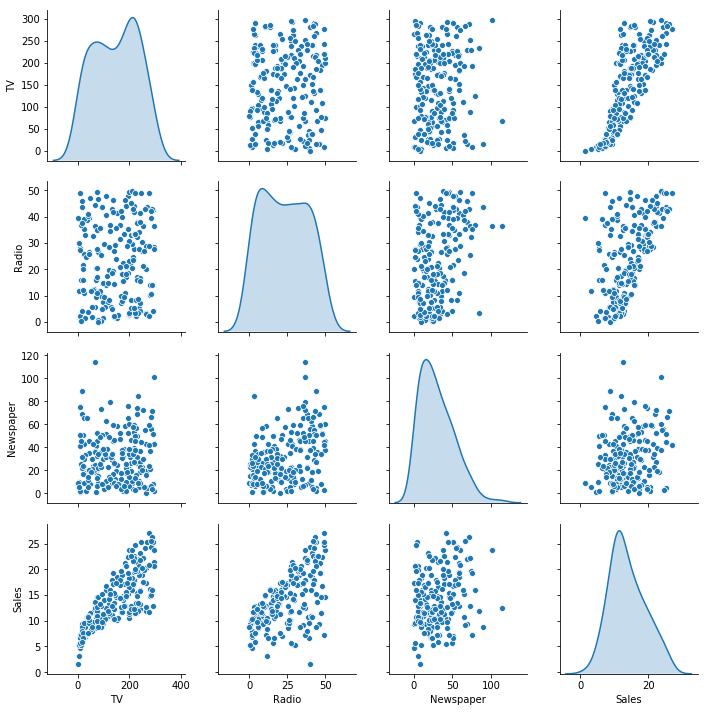

In [10]:
sns.pairplot( data , diag_kind='kde')

Any observations from the above graph?

Calculate correlations

In [11]:
data.TV.corr( data.Sales )

0.7822244248616061

In [12]:
data.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


Visualize the correlations

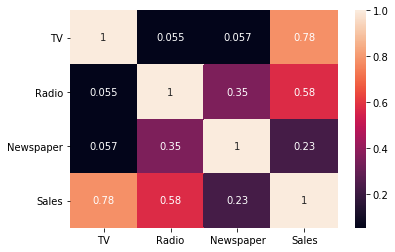

In [13]:
sns.heatmap( data.corr(), annot=True)

Observations: 
1. The diagonal of the above matirx shows the auto-correlation of the variables. It is always 1. We can observe that the correlation betweeb TV and Sales is highest i.e. 0.78 and then between sales and radio i.e. 0.576.
2. Correlations can vary from -1 to +1. Closer to +1 means strong positive correlation and close -1 means strong negative correlation. Closer to 0 means not very strongly correlated. variables with strong correlations are mostly probably candidates for model builing.

In [14]:
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
x = data[["TV","Radio","Newspaper"]]
y = data[["Sales"]]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=1)
lr=LinearRegression()
lr.fit(x_train,y_train)
print(lr.coef_)
print(lr.intercept_)

[[0.0468431  0.17854434 0.00258619]]
[2.90794702]


In [27]:
print("Testing Accuracy")
print(lr.score(x_test,y_test))

Testing Accuracy
0.8927605914615385


In [28]:
print("Training Accuracy")
print(lr.score(x_train,y_train))

Training Accuracy
0.8959372632325174


In [29]:
lr.coef_

array([[0.0468431 , 0.17854434, 0.00258619]])

In [30]:
lr.intercept_

array([2.90794702])

In [ ]:
#Without Newspaper
Testing Accuracy
0.894734495002707
Training Accuracy
0.8958528468776601

In [ ]:
#With Newspaper
Testing Accuracy
0.8927605914615385
Training Accuracy
0.8959372632325174

In [40]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
x = data[["TV","Radio"]]
y = data[["Sales"]]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=1)
lr=RandomForestRegressor(n_estimators=1000)
lr.fit(x_train,y_train)
print("Testing Accuracy")
print(lr.score(x_test,y_test))
print("Training Accuracy")
print(lr.score(x_train,y_train))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Testing Accuracy
0.9854829480149059
Training Accuracy
0.9971342510657727


In [41]:
lr.feature_importances_

array([0.65942112, 0.34057888])

# Predict Sales revenue using TV advertisement expenditure

Sales = beta_0 + beta_1*TV

sklearn library has a comprehensive set of APIs to split datasets, build models, test models and calculate accuracy metrics.

Import linear regression api from sklearn

In [11]:
from sklearn.linear_model import LinearRegression

Initial imported linear regression model api

In [12]:
linreg = LinearRegression()

Prepare input data set

In [16]:
x = data[['TV']]

In [17]:
type(x)

pandas.core.frame.DataFrame

In [18]:
y = data[['Sales']]

In [19]:
linreg.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Find the intercept beta_0 and slope beta_1

In [20]:
linreg.intercept_

array([7.03259355])

In [21]:
linreg.coef_

array([[0.04753664]])

Now the Sales prediction equation can be written as: 
 
Sales = beta_0 + beta_1 * TV

Sales = 7.03 + 0.0475 * TV

Sales = linreg.intercept_ + linreg.coef_ * TV

In [22]:
TV=1
Sales = 7.03 + 0.0475*TV 

## Interpretation of slope or beta_1 or linreg.coef_

# Make predictions for the new TV advertisment expenditure data

Suppose TV = 150 . Predict Sales?

In [23]:
TV = 150
Sales = linreg.intercept_ + linreg.coef_*TV

In [24]:
Sales

array([[14.16308961]])

We can also use inbuilt function for prediction

In [25]:
newData = {'TV': [150, 200, 250]}
newData = pd.DataFrame(data=newData)  ## Observe that 'x' type is pandas dataframe

In [26]:
linreg.predict(newData)

array([[14.16308961],
       [16.53992164],
       [18.91675366]])

Calculate accuracy of the built model

In [27]:
model = linreg.fit(x, y)

In [28]:
SalesPredictions = model.predict(x)

In [29]:
SalesPredictions[0:5]

array([[17.97077451],
       [ 9.14797405],
       [ 7.85022376],
       [14.23439457],
       [15.62721814]])

In [30]:
y[0:5]

,Sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9


In [31]:
model.coef_

array([[0.04753664]])

In [32]:
model.intercept_

array([7.03259355])

Calculate root mean sequare error: RMSE

In [33]:
from sklearn import metrics

mean_sequare_error = sum(i = 1 to 200 (y_i - SalesPredictions_i)^2 )/200

In [34]:
metrics.mean_squared_error(SalesPredictions, y)

10.512652915656757

In [35]:
rmse = np.sqrt(metrics.mean_squared_error(SalesPredictions, y))

In [36]:
rmse

3.2423221486546887

In [43]:
avgSales = np.mean(y)

In [44]:
avgSales

Sales    14.0225
dtype: float64

In [45]:
## Error percentage
## RMSE percentage

In [46]:
rmse/avgSales*100

Sales    23.122283
dtype: float64

In [47]:
# R^2
model.score(x,y)

0.611875050850071

In [50]:
0.782224*0.782224  ### Corr(TV, Sales) * Corr(TV, Sales)

0.6118743861760001

# Model 2

Build Sales = beta_0 + beta_1 * Radio

In [56]:
x = data[["TV","Radio"]]
y = data[["Sales"]]

In [57]:
from sklearn.model_selection import train_test_split

In [58]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [59]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
model2 = LinearRegression()
model2.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [60]:
#Without Newspaper
print("Training R2")
print(model2.score(x_train,y_train))
print("Testing R2")
print(model2.score(x_test,y_test))

Training R2
0.8958528468776601
Testing R2
0.894734495002707


In [55]:
x = data[["Radio"]]
y = data[["Sales"]]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)
model2 = LinearRegression()
model2.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [65]:
predictedSales = model2.predict(x_train)
mse = metrics.mean_squared_error(predictedSales, y_train)
trainRmse = np.sqrt(mse)
predictedSales = model2.predict(x_test)
mse = metrics.mean_squared_error(predictedSales, y_test)
testRmse = np.sqrt(mse)
print(testRmse)

3.8215351050686674


In [66]:
testRmse/np.mean(y_train)*100

Sales    27.709494
dtype: float64

In [67]:
model2.coef_

array([[0.1874808]])

Analyze beta_0 and beta_1

Analyze R^2

In [68]:
model2.score(x_train, y_train)

0.2917784045936668

In [69]:
model2.score(x_test, y_test)

0.41293932917162335

Analyze RMSE

In [70]:
predictedSales = model2.predict(x_train)

In [72]:
mse = metrics.mean_squared_error(predictedSales, y_train)

In [73]:
rmse = np.sqrt(mse)
rmse 

4.441526424991245

# Model 3

Build Sales = beta_0 + beta_1 * Newspaper

Analyze beta_0 and beta_1

Analyze R^2

Analyze RMSE

# Model 4: Multiple Linear Regression

Build Sales = beta_0 + beta_1 * TV + beta_2 * Radio

In [79]:
data.head(2)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4


In [80]:
x = data[["TV", "Radio"]]

In [81]:
x.head(2)

,TV,Radio
0,230.1,37.8
1,44.5,39.3


In [82]:
 y = data[["Sales"]]

In [83]:
y.head(2)

,Sales
0,22.1
1,10.4


Compare R^2 of Model 1 to 4

Any observations?

# Model 5 : Multiple Linear Regression

Build Sales = beta_0 + beta_1 TV + beta_2 Newspaper

Analyze beta_0, beta_1 and beta_2

Analyze R^2

Analyze RMSE

# Model 6

Build Sales = beta_0 + beta_1 Radio + beta_2 Newspaper

Analyze beta_0, beta_1 and beta_2

Analyze R^2

Analyze RMSE

# Model 7

Build Sales = beta_0 + beta_1 * TV + beta_2 Radio + beta_3 Newspaper

Analyze beta_0, beta_1, beta_2 and beta_3

Analyze R^2

Analyze RMSE